<a href="https://colab.research.google.com/github/shrivatsashetty/Projects/blob/main/Synamedia_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib notebook
# !pip install pandas-profiling

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
main_df = pd.read_csv("/content/drive/MyDrive/Data-Science/2DaysViewingSession.csv")

# **Tabular form**

In [4]:
main_df

,state,event_start_tz,duration_seconds,content_type,content,content_source
0,Selangor,2023-08-27 11:03:13.686 Asia/Singapore,40,VOD,Ombak Rindu,astro.2d
1,Kuala Lumpur,2023-08-27 10:48:56.982 Asia/Singapore,424,VOD,Pada Zaman Dahulu S4 Ep08,astro.7d
2,Johor,2023-08-27 10:56:51.851 Asia/Singapore,398,VOD,Upin & Ipin S16 Ep34,astro.30d
3,Kuala Lumpur,2023-08-27 10:31:40.717 Asia/Singapore,1411,VOD,Tanah Kubur S13 Ep08,astro.30d
4,Penang,2023-08-27 10:24:16.194 Asia/Singapore,2526,VOD,Narcotics Heroes Ep17,astro.30d
...,...,...,...,...,...,...
26011962,Kuala Lumpur,2023-08-28 15:04:59.497 Asia/Singapore,1,CDVR,Ghost of Relativity,TVB CLASSIC HD
26011963,Kuala Lumpur,2023-08-28 15:05:03.023 Asia/Singapore,906,CDVR,Ghost of Relativity,TVB CLASSIC HD
26011964,Kuala Lumpur,2023-08-28 15:05:16.592 Asia/Singapore,362,VOD,Upin & Ipin S15 Ep34,astro.30d
26011965,Sarawak,2023-08-28 14:59:50.687 Asia/Singapore,1241,VOD,Mechamato Ep01,astro.30d


# *main dataframe shape*

In [5]:
main_df.shape

(26011967, 6)

### ***the main dataframe contains 2,60,11,967 records***

# main dataset columns

In [6]:
i = 1
print("The dataset contains the following columns")
for column in main_df.columns:
  print(i,".",column)
  i+=1

The dataset contains the following columns
1 . state
2 . event_start_tz
3 . duration_seconds
4 . content_type
5 . content
6 . content_source


In [7]:
main_df.describe()

,duration_seconds
count,2.601197e+07
mean,7.747659e+02
std,1.274039e+03
min,0.000000e+00
25%,5.700000e+01
50%,2.490000e+02
75%,9.730000e+02
max,3.239500e+04


In [8]:
main_df.isna().sum()

state               13493121
event_start_tz             0
duration_seconds           0
content_type               0
content               110136
content_source          3780
dtype: int64

In [9]:
cleaned_df = main_df.dropna()

In [10]:
cleaned_df.shape

(12466618, 6)

In [11]:
type(cleaned_df.shape)

tuple

# difference b/w new and orignal data frame

In [12]:
records_differenece = main_df.shape[0] - cleaned_df.shape[0]

In [13]:
percent_record_difference = (records_differenece / main_df.shape[0]) * 100

### percentage difference in records after dropping rows

In [14]:
percent_record_difference

52.073528311027

In [15]:
cleaned_df.describe()

,duration_seconds
count,1.246662e+07
mean,5.246197e+02
std,1.160204e+03
min,0.000000e+00
25%,1.000000e+01
50%,1.250000e+02
75%,4.280000e+02
max,3.239500e+04


In [16]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466618 entries, 0 to 26011966
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   state             object
 1   event_start_tz    object
 2   duration_seconds  int64 
 3   content_type      object
 4   content           object
 5   content_source    object
dtypes: int64(1), object(5)
memory usage: 665.8+ MB


In [17]:
uniq_states = cleaned_df['state'].value_counts()

### List of distinct states

In [18]:
uniq_states


Kuala Lumpur                  6878719
Selangor                      2634243
Penang                         751319
Johor                          722522
Perak                          404518
Sarawak                        228747
Negeri Sembilan                219438
Sabah                          208386
Melaka                         119456
Kedah                           94178
Kelantan                        62062
Pahang                          52238
UNKNOWN                         48884
Terengganu                      31681
Putrajaya                        7271
Perlis                           1869
Karnataka                         379
Labuan                            370
ERROR                             169
Maharashtra                       129
Seoul                              10
Uttar Pradesh                       6
Occitanie                           5
England                             5
Victoria                            3
Jerusalem                           3
Tamil Nadu  

# List of actual Malaysian states plus federal territories

In [19]:
states_list = ["Perlis", "Kedah", "Penang", "Perak", "Selangor", "Negeri Sembilan",
               "Melaka", "Johor", "Kelantan", "Terengganu", "Pahang", "Kuala Lumpur", "Putrajaya", "Sabah", "Sarawak", "Labuan" ]

In [20]:
len(states_list)

16

# filtering duplicate state if any

In [21]:
uniq_states_list = list(set(states_list))

In [22]:
for state in uniq_states_list:
  print(state)

Perlis
Penang
Sabah
Kuala Lumpur
Negeri Sembilan
Pahang
Kedah
Johor
Putrajaya
Perak
Terengganu
Selangor
Melaka
Kelantan
Sarawak
Labuan


In [23]:
len(uniq_states_list)

16

In [24]:
print("Total distinct states:",uniq_states.count())

Total distinct states: 31


In [25]:
org_distinct_states = main_df['state'].value_counts()

In [26]:
org_distinct_states.count()

31

# Filtering  non Malaysian states

In [27]:
cleaned_df = cleaned_df[cleaned_df['state'].isin(uniq_states_list)]

In [28]:
# type(cleaned_df['state'].isin(uniq_states_list))

In [29]:
cleaned_df_states = cleaned_df['state'].value_counts()

In [30]:
cleaned_df_states

Kuala Lumpur       6878719
Selangor           2634243
Penang              751319
Johor               722522
Perak               404518
Sarawak             228747
Negeri Sembilan     219438
Sabah               208386
Melaka              119456
Kedah                94178
Kelantan             62062
Pahang               52238
Terengganu           31681
Putrajaya             7271
Perlis                1869
Labuan                 370
Name: state, dtype: int64

In [31]:
type(cleaned_df_states)

pandas.core.series.Series

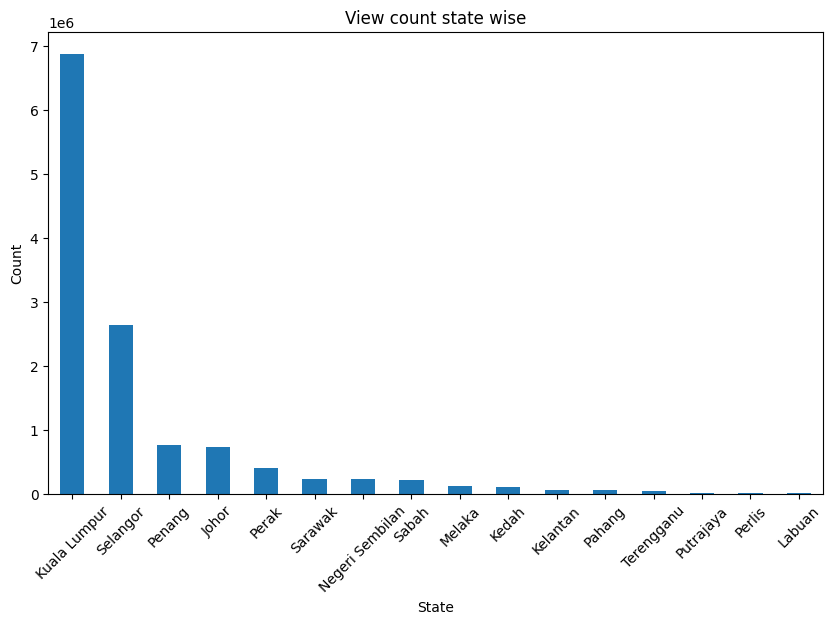

In [32]:
plt.figure(figsize=(10, 6))
cleaned_df_states.plot(kind='bar')
plt.title('View count state wise')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

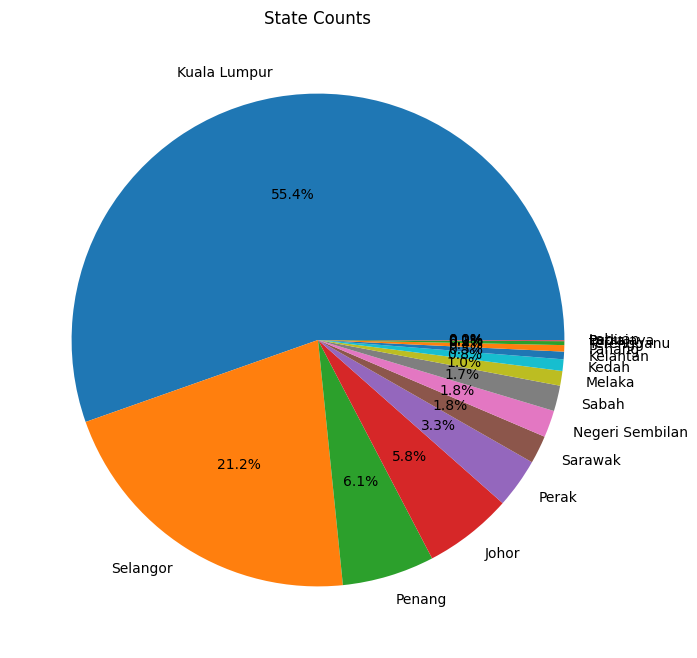

In [33]:
plt.figure(figsize=(8, 8))
cleaned_df_states.plot(kind='pie', autopct='%1.1f%%')
plt.title('State Counts')
plt.ylabel('')  # Remove the default ylabel
plt.show()

In [34]:
cleaned_df_states.sum()

12417017

In [35]:
cleaned_df_states.count()

16

### hence the **final version of cleaned_df** contains list of only 16 states which is actual no of states in malaysia

In [36]:
cleaned_df.shape

(12417017, 6)

# list of distinct content_type (content_category)


In [37]:
content_categories = cleaned_df['content_type'].value_counts()

In [38]:
content_categories

VOD                7331475
LINEAR             2212712
CDVR               1734805
Live Pause          458556
Play From Start     399777
IP Switch           279692
Name: content_type, dtype: int64

# list of distinct content (T.V Shows)

In [39]:
content_series = cleaned_df['content'].value_counts()

 * ***the value_counts() method will always return a pandas series with unique indexes so no need to worry about the uniqueness of index names***

In [40]:
content_series

(L) BWF World Championships: Finals     178624
(L) PL: Newcastle vs Liverpool          165336
(L) PL: Sheffield vs Manchester City    112457
The Flash [Fast Premiere]               105239
Tiktok Awards Malaysia                   81360
                                         ...  
Thavamai Thavamirundhu Ep324                 1
The Cleaner S2 Ep02                          1
GG Bond : Undersea Journey S2 Ep26           1
Buser Files Investigasi Ep12                 1
NRI Hadsaa S1 Ep06                           1
Name: content, Length: 63416, dtype: int64

In [41]:
distinct_contents_dictionary = content_series.to_dict()

In [42]:
# since the dictionary is too big lets only see the first 10 elements
first_few_elements = 10
for key, value in distinct_contents_dictionary.items():
  print(key, ":", distinct_contents_dictionary[key])
  first_few_elements -= 1
  if first_few_elements == 0:
    break

(L) BWF World Championships: Finals : 178624
(L) PL: Newcastle vs Liverpool : 165336
(L) PL: Sheffield vs Manchester City : 112457
The Flash [Fast Premiere] : 105239
Tiktok Awards Malaysia : 81360
Super Singer Junior : 70777
(L) Formula 1 Main Race 2023 : 61944
FIBA: Latvia vs Lebanon : 54144
Start Music : 49057
(L) World Athletics Championships 2023 : 48220


# Total count of distinct TV shows i.e contents

In [43]:
len(distinct_contents_dictionary)

63416

In [44]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(main_df)
# prof.to_file(output_file='output.html')

# Scaling down the dataset

In [45]:
sample_size = int(cleaned_df.shape[0] * 0.5)

In [46]:
sample_size

6208508

In [47]:
random_sampled_df = cleaned_df.sample(n=sample_size, random_state=42)

In [48]:
sampled_states_series = random_sampled_df["state"].value_counts()

In [49]:
sampled_states_series

Kuala Lumpur       3439990
Selangor           1316576
Penang              376049
Johor               361534
Perak               201772
Sarawak             114235
Negeri Sembilan     109326
Sabah               104207
Melaka               59737
Kedah                47263
Kelantan             30892
Pahang               26308
Terengganu           15926
Putrajaya             3593
Perlis                 904
Labuan                 196
Name: state, dtype: int64

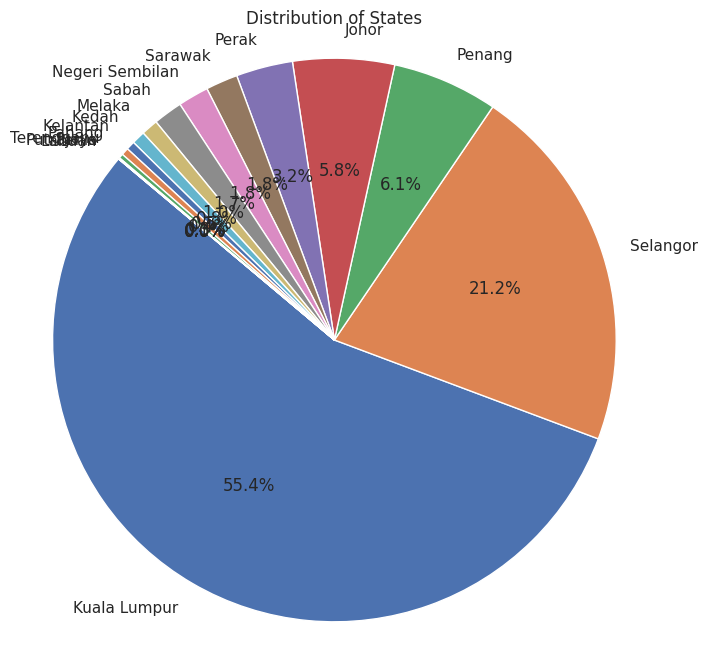

In [50]:


plt.figure(figsize=(8, 8))

# Plot a pie chart using Seaborn with the default color palette
sns.set()  # Reset the color palette to default
plt.pie(sampled_states_series, labels = sampled_states_series.index, autopct = '%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of States')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [51]:
# datetime_format = "%Y-%m-%d %H:%M:%S.%f %Z"

# # Convert the column to datetime using the specified format
# cleaned_df['event_start_tz'] = pd.to_datetime(cleaned_df['event_start_tz'], format=datetime_format)
